In [180]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time

In [181]:
#sleeps_temp = pd.read_csv('sleeps.csv')
#sleeps_temp = sleeps_temp[sleeps_temp.user_id!=2509]
#sleeps_temp = sleeps_temp[sleeps_temp.user_id!=2461]
#sleeps_temp = sleeps_temp[sleeps_temp.is_nap=='f'].reset_index()
#sleeps_temp.to_csv('sleeps_temp.csv')

In [182]:
#manually added in missing days in Excel
sleeps = pd.read_csv('sleeps_temp.csv')
sleeps.head(30)

,user_id,start,end,date_md,score,time_in_bed,latency,disturbances,wake_duration,light_sleep_duration,slow_wave_sleep_duration,rem_sleep_duration,cycles_count,debt_post,is_nap,recovery_score,resting_heart_rate,hrv_rmssd
0,828,9/15/2015 2:42,9/15/2015 12:09,9/15,82,34020000,2100132,27,6870000,22230000,3600000,1320000,2,4266209.55,f,63,49,0.064647
1,828,9/16/2015 2:03,9/16/2015 12:06,9/16,87,36180000,2790134,25,6630000,22860000,3210000,3480000,3,2436815.25,f,74,45,0.075670
2,828,9/17/2015 0:36,9/17/2015 12:15,9/17,97,41940000,7800470,24,10410000,25680000,3240000,2580000,4,513169.69,f,68,44,0.036925
3,828,9/18/2015 2:38,9/18/2015 12:24,9/18,94,35150127,1410042,32,3960000,24810000,2160000,4230000,7,1425316.75,f,90,53,0.098787
4,828,9/19/2015 1:44,9/19/2015 11:30,9/19,0,0,0,NaN,0,0,0,0,NaN,NaN,f,NaN,NaN,NaN
5,828,9/20/2015 3:38,9/20/2015 11:44,9/20,70,29156349,1560075,18,4260000,18090000,2910000,3900000,6,7668000.00,f,42,43,0.050816
6,828,9/21/2015 2:30,9/21/2015 12:18,9/21,74,35273083,1525941,23,6270000,16020000,4620000,8370000,6,4792906.02,f,50,45,0.058456
7,828,9/22/2015 2:16,9/22/2015 12:37,9/22,93,37294761,1050923,31,4860000,24000000,3870000,4560000,7,1012272.72,f,69,43,0.063264
8,828,9/23/2015 2:44,9/23/2015 12:20,9/23,87,34522859,870915,23,3630000,22560000,2940000,5400000,10,2610197.56,f,76,47,0.081390
9,828,9/24/2015 3:03,9/24/2015 12:34,9/24,89,34284759,1140930,14,3360000,22140000,3480000,5310000,10,2307830.92,f,74,46,0.076798


In [183]:
users = list(set(sleeps.user_id.values))

In [184]:
def epoch_end_convert(df):
    '''
    takes dataframe and converts date column to epoch milliseconds
    inputs:
        df = dataframe name
    '''
    try:
        #return (int(time.mktime(time.strptime(df['end'], '%Y-%m-%d %H:%M:%S'))) - 14400)*1000
        return (int(time.mktime(time.strptime(df['end'], '%m/%d/%Y %H:%M'))) - 14400)*1000
    except:
        #handles sleeps that have no data/were missing
        return (int(time.mktime(time.strptime(df['date_md']+'/2015 12:00', '%m/%d/%Y %H:%M'))) - 4400)*1000

In [185]:
#sleeps['date_md'][26] +  '/2015 0:00'

In [186]:
sleeps['end_epoch'] = sleeps.apply(epoch_end_convert, axis=1)
sleeps.head()

,user_id,start,end,date_md,score,time_in_bed,latency,disturbances,wake_duration,light_sleep_duration,slow_wave_sleep_duration,rem_sleep_duration,cycles_count,debt_post,is_nap,recovery_score,resting_heart_rate,hrv_rmssd,end_epoch
0,828,9/15/2015 2:42,9/15/2015 12:09,9/15,82,34020000,2100132,27,6870000,22230000,3600000,1320000,2,4266209.55,f,63,49,0.064647,1442318940000
1,828,9/16/2015 2:03,9/16/2015 12:06,9/16,87,36180000,2790134,25,6630000,22860000,3210000,3480000,3,2436815.25,f,74,45,0.075670,1442405160000
2,828,9/17/2015 0:36,9/17/2015 12:15,9/17,97,41940000,7800470,24,10410000,25680000,3240000,2580000,4,513169.69,f,68,44,0.036925,1442492100000
3,828,9/18/2015 2:38,9/18/2015 12:24,9/18,94,35150127,1410042,32,3960000,24810000,2160000,4230000,7,1425316.75,f,90,53,0.098787,1442579040000
4,828,9/19/2015 1:44,9/19/2015 11:30,9/19,0,0,0,NaN,0,0,0,0,NaN,NaN,f,NaN,NaN,NaN,1442662200000


#Adding In Race Periods

In [187]:
date_markers = pd.read_csv('epoch_dates.csv')

In [188]:
date_markers.head()

,ET_Date,date_start_epoch,race_period,bike_period,race_period_start,race_period_end,bike_period_start,bike_period_end
0,9/15/2015 0:00,1442289600000,1,1,1,0,1,0
1,9/16/2015 0:00,1442376000000,1,1,0,0,0,0
2,9/17/2015 0:00,1442462400000,1,1,0,0,0,0
3,9/18/2015 0:00,1442548800000,1,1,0,0,0,0
4,9/19/2015 0:00,1442635200000,1,1,0,0,0,0


In [189]:
date_markers.values[0][3]

1L

In [190]:
date_markers = date_markers[date_markers['race_period_start'] > 0].reset_index()
#dictionary of race period to start epoch
race_start_dict = {}
for i in range(0, len(date_markers)):
    race_start_dict[date_markers.values[i][3]] = date_markers.values[i][2]

#date_markers2 = pd.read_csv('epoch_dates.csv')
#date_markers2 = date_markers2[date_markers2['bike_period_start'] > 0].reset_index()
#bike_start_dict = {}
#for i in range(0, len(date_markers2)):
#    bike_start_dict[date_markers2.values[i][4]] = date_markers2.values[i][2]


In [191]:
race_start_dict

{0L: 1448164800000L,
 1L: 1442289600000L,
 2L: 1443240000000L,
 3L: 1445054400000L,
 4L: 1446264000000L,
 5L: 1447473600000L}

In [192]:
def add_race(df):
    if (df.end_epoch > 1442188800000) and (df.end_epoch < race_start_dict[2]):
        return 1
    elif (df.end_epoch >= race_start_dict[2]) and (df.end_epoch <= (race_start_dict[3])):
        return 2
    elif (df.end_epoch >= race_start_dict[3]) and (df.end_epoch <= (race_start_dict[4])):
        return 3
    elif (df.end_epoch >= race_start_dict[4]) and (df.end_epoch <= (race_start_dict[5])):
        return 4
    elif (df.end_epoch >= race_start_dict[5]) and (df.end_epoch <= 1448147520000):
        return 5
    elif (df.end_epoch > 1448147520000):
        return 0


In [193]:
def add_bike(df, bike_start_dict):
    for user in users:
        if df.user_id == user:
            if (df.end_epoch <= bike_start_dict[user, 1]):
                return 1
            elif (df.end_epoch <= bike_start_dict[user, 2]) and (df.end_epoch >= bike_start_dict[user, 1]):
                return 2
            elif (df.end_epoch <= bike_start_dict[user, 3]) and (df.end_epoch >= bike_start_dict[user, 2]):
                return 3
            elif (df.end_epoch <= bike_start_dict[user, 4]) and (df.end_epoch >= bike_start_dict[user, 3]):
                return 4
            elif (df.end_epoch <= bike_start_dict[user, 5]) and (df.end_epoch >= bike_start_dict[user, 4]):
                return 5
            elif (df.end_epoch <= bike_start_dict[user, 6]) and (df.end_epoch >= bike_start_dict[user, 5]):
                return 6
            elif (df.end_epoch <= bike_start_dict[user, 7]) and (df.end_epoch >= bike_start_dict[user, 6]):
                return 7
            elif (df.end_epoch <= bike_start_dict[user, 8]) and (df.end_epoch >= bike_start_dict[user, 7]):
                return 8
            elif (df.end_epoch >= bike_start_dict[user, 8]):
                return 9
                

In [202]:
def add_periods(date_markers, df, buildup_days=0, version=None):
    if version==None:
        print "Enter Either 'race' or 'bike'!"
    if version=="race":
        #Collapse the data frame into only the start and end dates for each race period
        date_markers = date_markers[date_markers['race_period_start'] > 0].reset_index()
        #dictionary of race period to start epoch
        race_start_dict = {}
        for i in range(0, len(date_markers)):
            race_start_dict[date_markers.values[i][4]] = date_markers.values[i][3]
        #Now label each race period as 1, 2, 3, 4, or 5
        df['race_period'] = df.apply(add_race, axis=1)
        
        #add in buildup days
        df=df.sort(['user_id', 'race_period', 'end_epoch'], ascending=[True, True, False]).reset_index(drop=True)
        race_groups = df.groupby(['user_id', 'race_period']).cumcount()
        build_days = pd.DataFrame(dict(buildup_days = race_groups))
        new_df = df.join(build_days, how="left")
        return_df = new_df
    
    elif version=="bike":
        #same process, but with bike efforts
        bike_dates = pd.read_csv('huxc_bike_distances.csv')
        bike_dates['next_day'] = bike_dates['date_start_epoch'] + 86400000
        bike_start_dict={} #key is the user_id and bike period, value is the date start epoch
        for i in range(0, len(bike_dates)):
            bike_start_dict[bike_dates.values[i][0], bike_dates.values[i][1]] = bike_dates.values[i][5]
        #cycle through bike_start dict, enter placement values so day gets filled
        for user in users:
            for i in range(1, 10):
                if np.isnan(bike_start_dict[user, i]) and i == 1:
                    bike_start_dict[user, i] = bike_start_dict[2469, i]
                if np.isnan(bike_start_dict[user, i]) and i == 2:
                    bike_start_dict[user, i] = bike_start_dict[2469, i]
                if np.isnan(bike_start_dict[user, i]) and i == 3:
                    bike_start_dict[user, i] = bike_start_dict[2469, i] 
                if np.isnan(bike_start_dict[user, i]) and i == 4:
                    bike_start_dict[user, i] = bike_start_dict[2469, i]
                if np.isnan(bike_start_dict[user, i]) and i == 5:
                    bike_start_dict[user, i] = bike_start_dict[2469, i]
                if np.isnan(bike_start_dict[user, i]) and i == 6:
                    bike_start_dict[user, i] = bike_start_dict[2469, i]
                if np.isnan(bike_start_dict[user, i]) and i == 7:
                    bike_start_dict[user, i] = bike_start_dict[2469, i]
                if np.isnan(bike_start_dict[user, i]) and i == 8:
                    bike_start_dict[user, i] = bike_start_dict[2469, i]
                if np.isnan(bike_start_dict[user, i]) and i == 9:
                    bike_start_dict[user, i] = bike_start_dict[2469, i]
        df['bike_period'] = df.apply(add_bike, axis=1, args=(bike_start_dict,))
        df=df.sort(['user_id', 'bike_period', 'end_epoch'], ascending=[True, True, False]).reset_index(drop=True)
        bike_groups = df.groupby(['user_id', 'bike_period']).cumcount()
        build_days = pd.DataFrame(dict(buildup_days = bike_groups))
        new_df = df.join(build_days, how="left")
        return_df = new_df
        
    if buildup_days != 0:
        return_df = return_df[return_df['buildup_days'] < buildup_days]
        
    final_return_df = return_df[return_df['race_period']!=0]
    return return_df

#Aggregating Weighted Rolling Average of Variables Leading up To Races/Bikes

In [195]:
def filter_nans(x, y):
    filtered = filter(lambda o: not np.isnan(o[0]) and not np.isnan(o[1]), zip(x, y))    
    return [el[0] for el in filtered], [el[1] for el in filtered]

In [196]:
def get_item(df_column_tuple):
    return df_column_tuple[0], df_column_tuple[1]

In [197]:
def weighted_rolling_average(data):
    #must take into account nan
    #number of things in values
    n = len(data)
    weights = []
    values = []
    for i in range(0, n):
        values.append(data[i])
        #don't care about race day
        weights.append(i+1)
    numbers = [w*v for w,v in zip(weights,values)]
    filtered_numbers, filtered_weights = filter_nans(numbers, weights)
    try:
        return sum(filtered_numbers)/sum(filtered_weights)
    except ZeroDivisionError:
        return np.nan
        

In [198]:
def weighted_rolling_average_df(df, activity_type, variable):
    weighted_avg_dict = {}
    periods = []
    if activity_type=='bike':
        periods = [1,2,3,4,5,6,7,8,9]
        for u in users:
            user_df = df[df['user_id']==u]
            for i in range(0, len(periods)):
                user_period_df=user_df[user_df['bike_period']==periods[i]]
                w_r_a = weighted_rolling_average(user_period_df[variable].reset_index(drop=True))
                weighted_avg_dict[u, periods[i], variable] = w_r_a
        
    elif activity_type=='race':
        periods = [1,2,3,4,5]
        for u in users:
            user_df = df[df['user_id']==u]
            for i in range(0, len(periods)):
                user_period_df=user_df[user_df['race_period']==periods[i]]
                w_r_a = weighted_rolling_average(user_period_df[variable].reset_index(drop=True))
                weighted_avg_dict[u, periods[i], variable] = w_r_a
                
    
    agg_df = pd.DataFrame(weighted_avg_dict.items(), columns=['temp', variable+'_temp'])
    agg_df['user_id'], agg_df[activity_type+'_period'] = zip(*agg_df['temp'].map(get_item))
    agg_df[variable] = agg_df[variable+'_temp']
    agg_df = agg_df.sort(['user_id', activity_type+'_period'], ascending = [True, True]).reset_index(drop=True)
    agg_df = agg_df.drop(['temp', variable+'_temp'], axis=1)
    return agg_df

In [199]:
def make_recovery_df(df_to_calculate, activity_type):
    if activity_type == 'bike' or activity_type == 'race':
        new_df = weighted_rolling_average_df(df_to_calculate, activity_type, 'resting_heart_rate')
        new_df2 = weighted_rolling_average_df(df_to_calculate, activity_type, 'hrv_rmssd')
        new_df3 = weighted_rolling_average_df(df_to_calculate, activity_type, 'time_in_bed')
        new_df4 = weighted_rolling_average_df(df_to_calculate, activity_type, 'latency')
        new_df5 = weighted_rolling_average_df(df_to_calculate, activity_type, 'time_in_bed')
        new_df6 = weighted_rolling_average_df(df_to_calculate, activity_type, 'rem_sleep_duration')
        new_df7 = weighted_rolling_average_df(df_to_calculate, activity_type, 'slow_wave_sleep_duration')
        new_df8 = weighted_rolling_average_df(df_to_calculate, activity_type, 'light_sleep_duration')
        new_df9 = weighted_rolling_average_df(df_to_calculate, activity_type, 'wake_duration')
        new_df10 = weighted_rolling_average_df(df_to_calculate, activity_type, 'cycles_count')
        new_df11 = weighted_rolling_average_df(df_to_calculate, activity_type, 'score')
        new_df12 = weighted_rolling_average_df(df_to_calculate, activity_type, 'recovery_score')
        merge_df1 = pd.merge(new_df, new_df2, how='left')
        merge_df2 = pd.merge(merge_df1, new_df3, how='left')
        merge_df3 = pd.merge(merge_df2, new_df4, how='left')
        merge_df4 = pd.merge(merge_df3, new_df5, how='left')
        merge_df5 = pd.merge(merge_df4, new_df6, how='left')
        merge_df6 = pd.merge(merge_df5, new_df7, how='left')
        merge_df7 = pd.merge(merge_df6, new_df8, how='left')
        merge_df8 = pd.merge(merge_df7, new_df9, how='left')
        merge_df9 = pd.merge(merge_df8, new_df10, how='left')
        merge_df10 = pd.merge(merge_df9, new_df11, how='left')
        merged_df = pd.merge(merge_df10, new_df12, how='left')
        dummies = pd.get_dummies(merged_df['user_id'], prefix='user')
        final_df = pd.concat([merged_df, dummies], axis=1)
        final_df = final_df.drop(['user_828'], axis=1)
        if activity_type=='race':
            race_times = pd.read_csv('huxc_race_times.csv')
            race_times=race_times[race_times['user_id']!=2461]
            race_times=race_times[race_times['user_id']!=2509]
            final_race_df = final_df.merge(race_times, how='left')
            final_race_df = final_race_df[final_race_df['user_id']!=2439]
            return final_race_df
        if activity_type=='bike':
            bike_results = pd.read_csv('huxc_bike_distances.csv')
            bike_results = bike_results[bike_results['user_id']!=2461]
            bike_results = bike_results[bike_results['user_id']!=2509]
            bike_results = bike_results.drop(['date_md', 'date_start_epoch'], axis=1)
            final_bike_df = final_df.merge(bike_results, how='left')
            return final_bike_df
    else:
        return 'Enter either "race" or "bike", please.'

###For Races

In [203]:
test_race = add_periods(date_markers=date_markers, df=sleeps, buildup_days=14, version="race")
test_race = test_race.sort(['user_id', 'end_epoch'], ascending=['True', 'True']).reset_index(drop=True)
test_race = test_race[test_race['race_period']!=0]

test_race.to_csv('race_df_pre_weighting.csv')

test_race_fivedays = test_race[test_race.buildup_days <=5]
test_race_sixdays = test_race[test_race.buildup_days <= 6]
test_race_sevendays = test_race[test_race.buildup_days <= 7]
test_race_tendays = test_race[test_race.buildup_days <= 10]
test_race_fourdays = test_race[test_race.buildup_days <= 4]
test_race_threedays = test_race[test_race.buildup_days <= 3]
test_race_twodays = test_race[test_race.buildup_days <= 2]

df = make_recovery_df(test_race, 'race')
df.to_csv('final_race_df.csv')
df_five_weighted = make_recovery_df(test_race_fivedays, 'race')
df_five_weighted.to_csv('final_race_df_5daysweighted.csv')
df_six_weighted = make_recovery_df(test_race_sixdays, 'race')
df_six_weighted.to_csv('final_race_df_6daysweighted.csv')
df_seven_weighted = make_recovery_df(test_race_sevendays, 'race')
df_seven_weighted.to_csv('final_race_df_7daysweighted.csv')
df_ten_weighted = make_recovery_df(test_race_tendays, 'race')
df_ten_weighted.to_csv('final_race_df_10daysweighted.csv')
df_four_weighted = make_recovery_df(test_race_fourdays, 'race')
df_four_weighted.to_csv('final_race_df_4daysweighted.csv')
df_three_weighted = make_recovery_df(test_race_threedays, 'race')
df_three_weighted.to_csv('final_race_df_3daysweighted.csv')
df_two_weighted = make_recovery_df(test_race_twodays, 'race')
df_two_weighted.to_csv('final_race_df_2daysweighted.csv')

###Same Process, but for bike efforts

In [207]:
test_bike = add_periods(date_markers=date_markers, df=sleeps, buildup_days=14, version="bike")
test_bike = test_bike.sort(['user_id', 'end_epoch'], ascending=['True', 'True']).reset_index(drop=True)
test_bike = test_bike.drop(['race_period'], axis=1)
test_bike.to_csv('bike_df_pre_weighting.csv')

test_bike_fivedays = test_bike[test_bike.buildup_days <=5]
test_bike_sixdays = test_bike[test_bike.buildup_days <= 6]
test_bike_sevendays = test_bike[test_bike.buildup_days <= 7]
test_bike_tendays = test_bike[test_bike.buildup_days <= 10]
test_bike_fourdays = test_bike[test_bike.buildup_days <= 4]
test_bike_threedays = test_bike[test_bike.buildup_days <= 3]
test_bike_twodays = test_bike[test_bike.buildup_days <= 2]

df = make_recovery_df(test_bike, 'bike')
df.to_csv('final_bike_df.csv')
df_five_weighted = make_recovery_df(test_bike_fivedays, 'bike')
df_five_weighted.to_csv('final_bike_df_5daysweighted.csv')
df_six_weighted = make_recovery_df(test_bike_sixdays, 'bike')
df_six_weighted.to_csv('final_bike_df_6daysweighted.csv')
df_seven_weighted = make_recovery_df(test_bike_sevendays, 'bike')
df_seven_weighted.to_csv('final_bike_df_7daysweighted.csv')
df_ten_weighted = make_recovery_df(test_bike_tendays, 'bike')
df_ten_weighted.to_csv('final_bike_df_10daysweighted.csv')
df_four_weighted = make_recovery_df(test_bike_fourdays, 'bike')
df_four_weighted.to_csv('final_bike_df_4daysweighted.csv')
df_three_weighted = make_recovery_df(test_bike_threedays, 'bike')
df_three_weighted.to_csv('final_bike_df_3daysweighted.csv')
df_two_weighted = make_recovery_df(test_bike_twodays, 'bike')
df_two_weighted.to_csv('final_bike_df_2daysweighted.csv')

#Some Plots

In [122]:
def HRV_plots(indf):
    indf = indf.sort(['user_id', 'end_epoch'], ascending=['True', 'True']).reset_index(drop=True)
    users = list(set(indf.user_id.values))
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 45), tight_layout=True)
    for ax, user in zip(axes.ravel(),users):
        person = test[test['user_id']==user]
        person = person.sort(['user_id', 'end_epoch'], ascending=[True, True]).reset_index(drop=True)
        person = person.drop(['start', 'end', 'score', 'time_in_bed', 'latency', 'disturbances', 
                      'wake_duration', 'light_sleep_duration', 'slow_wave_sleep_duration',
                     'cycles_count', 'rem_sleep_duration', 'debt_post', 'is_nap', 'recovery_score'], 1)
        groups = person.groupby(['user_id']).cumcount()
        daydf = pd.DataFrame(dict(days=groups))
        new_df = person.join(daydf, how='left')
        ax.plot(new_df.days, new_df.hrv_rmssd, marker='o', linestyle='--')
        ax.set_xlim(-1, 70)
        ax.set_title(user)
        ax.set_ylabel('HRV')
        ax.set_xlabel('Days')

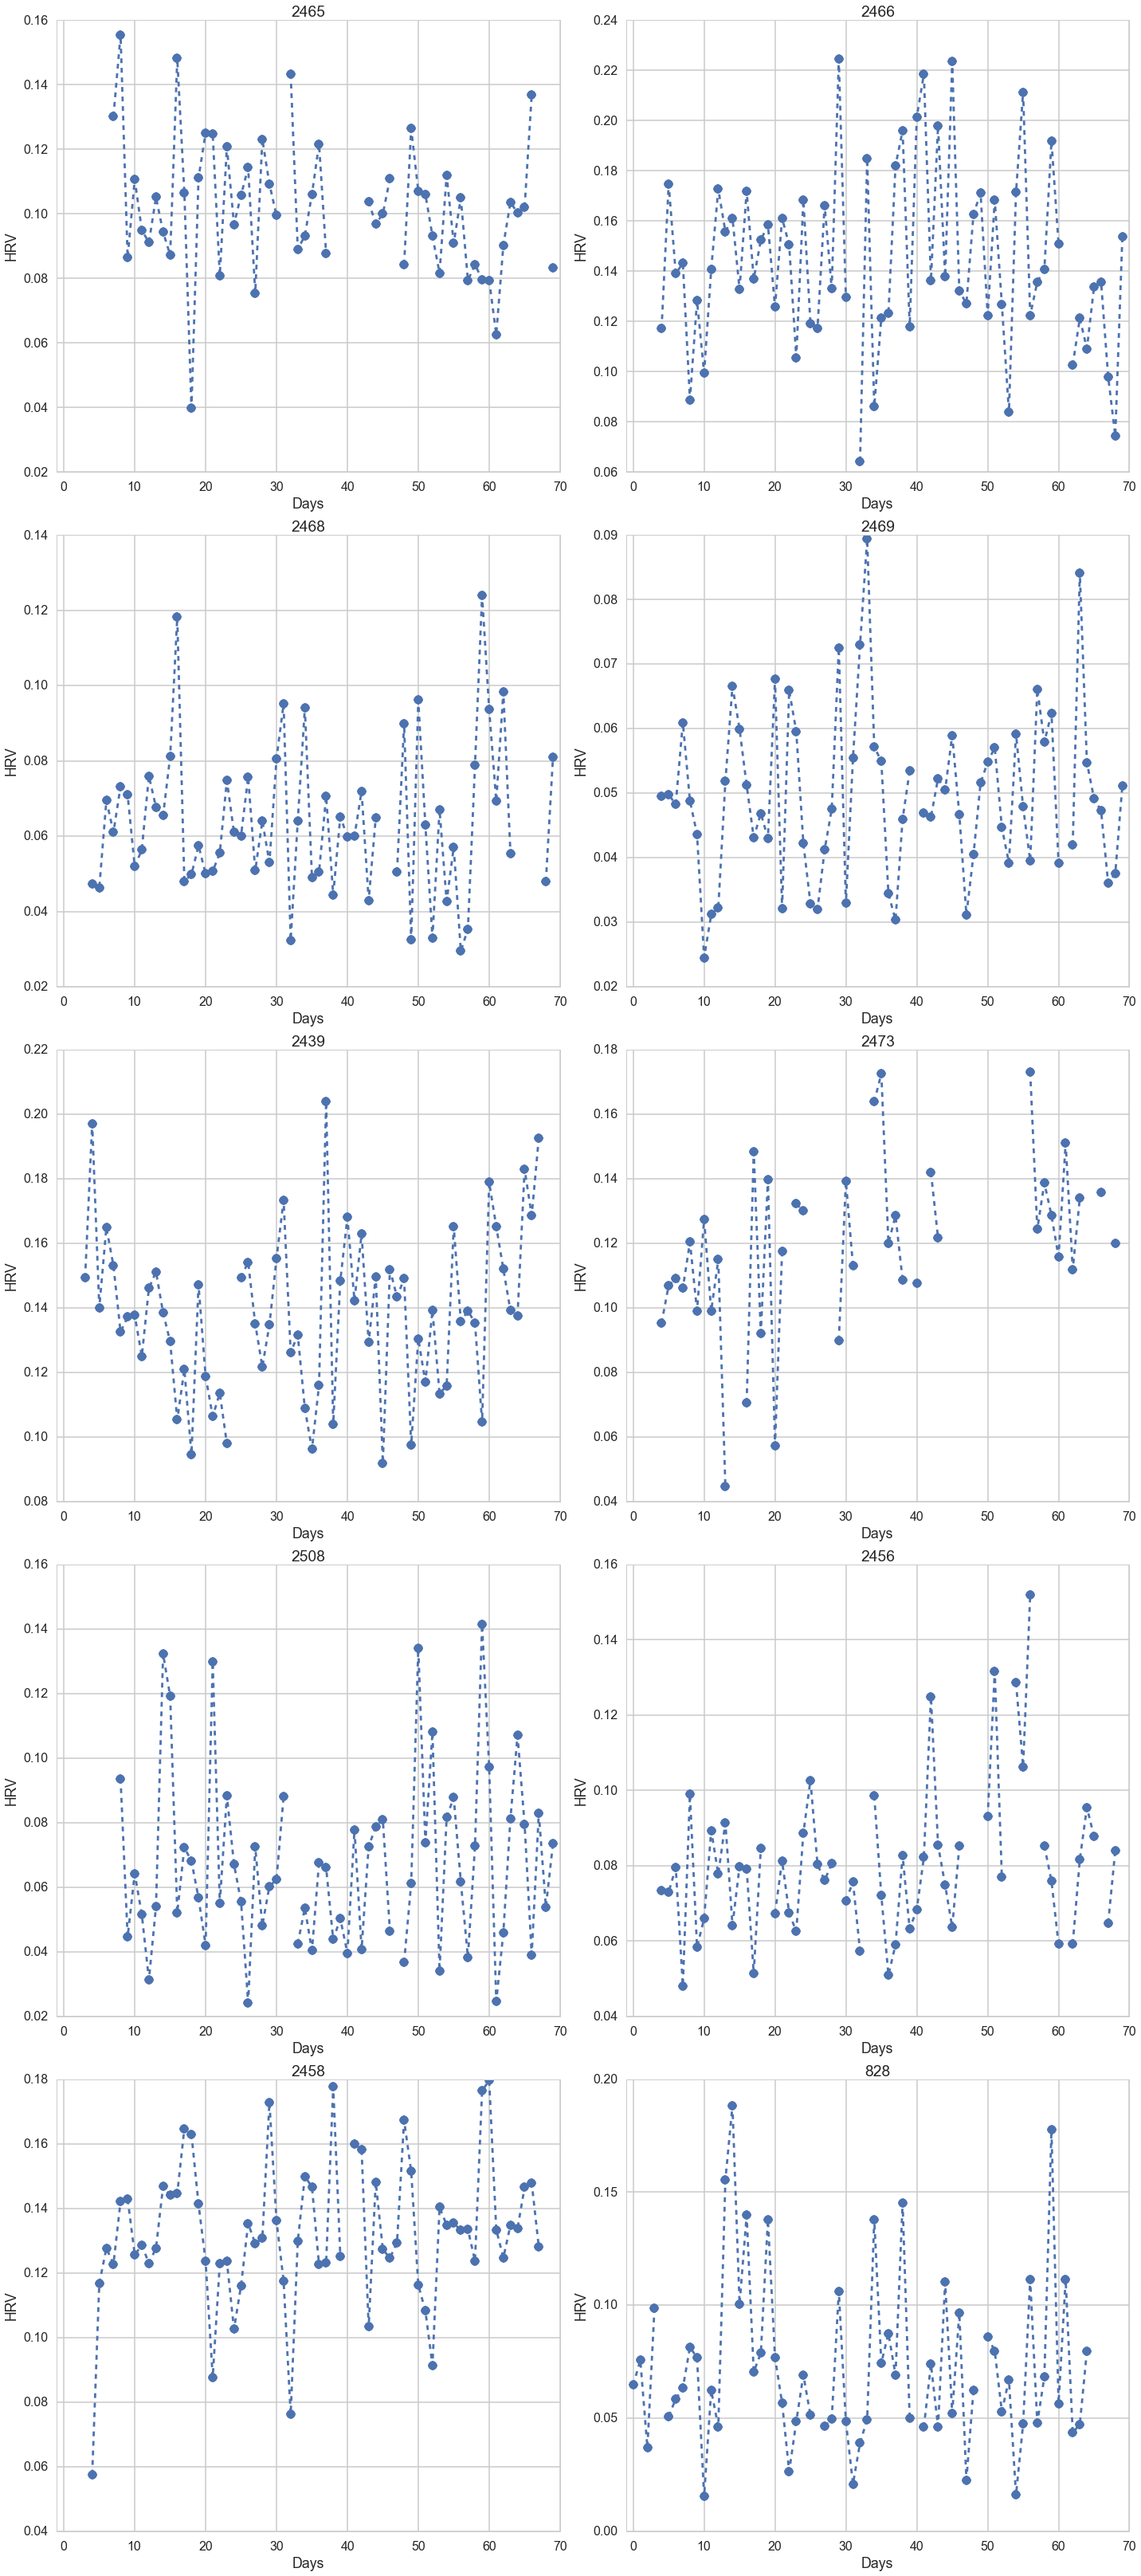

In [123]:
HRV_plots(test)

In [126]:
def RHR_plots(indf):
    indf = indf.sort(['user_id', 'end_epoch'], ascending=['True', 'True']).reset_index(drop=True)
    users = list(set(indf.user_id.values))
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 45), tight_layout=True)
    for ax, user in zip(axes.ravel(),users):
        person = test[test['user_id']==user]
        person = person.sort(['user_id', 'end_epoch'], ascending=[True, True]).reset_index(drop=True)
        person = person.drop(['start', 'end', 'score', 'time_in_bed', 'latency', 'disturbances', 
                      'wake_duration', 'light_sleep_duration', 'slow_wave_sleep_duration',
                     'cycles_count', 'rem_sleep_duration', 'debt_post', 'is_nap', 'recovery_score'], 1)
        groups = person.groupby(['user_id']).cumcount()
        daydf = pd.DataFrame(dict(days=groups))
        new_df = person.join(daydf, how='left')
        ax.plot(new_df.days, new_df.resting_heart_rate, marker='o', linestyle='--', color='green')
        ax.set_xlim(-1, 70)
        ax.set_ylim(30, 75)
        ax.set_title(user)
        ax.set_ylabel('Resting Heart Rate')
        ax.set_xlabel('Days')

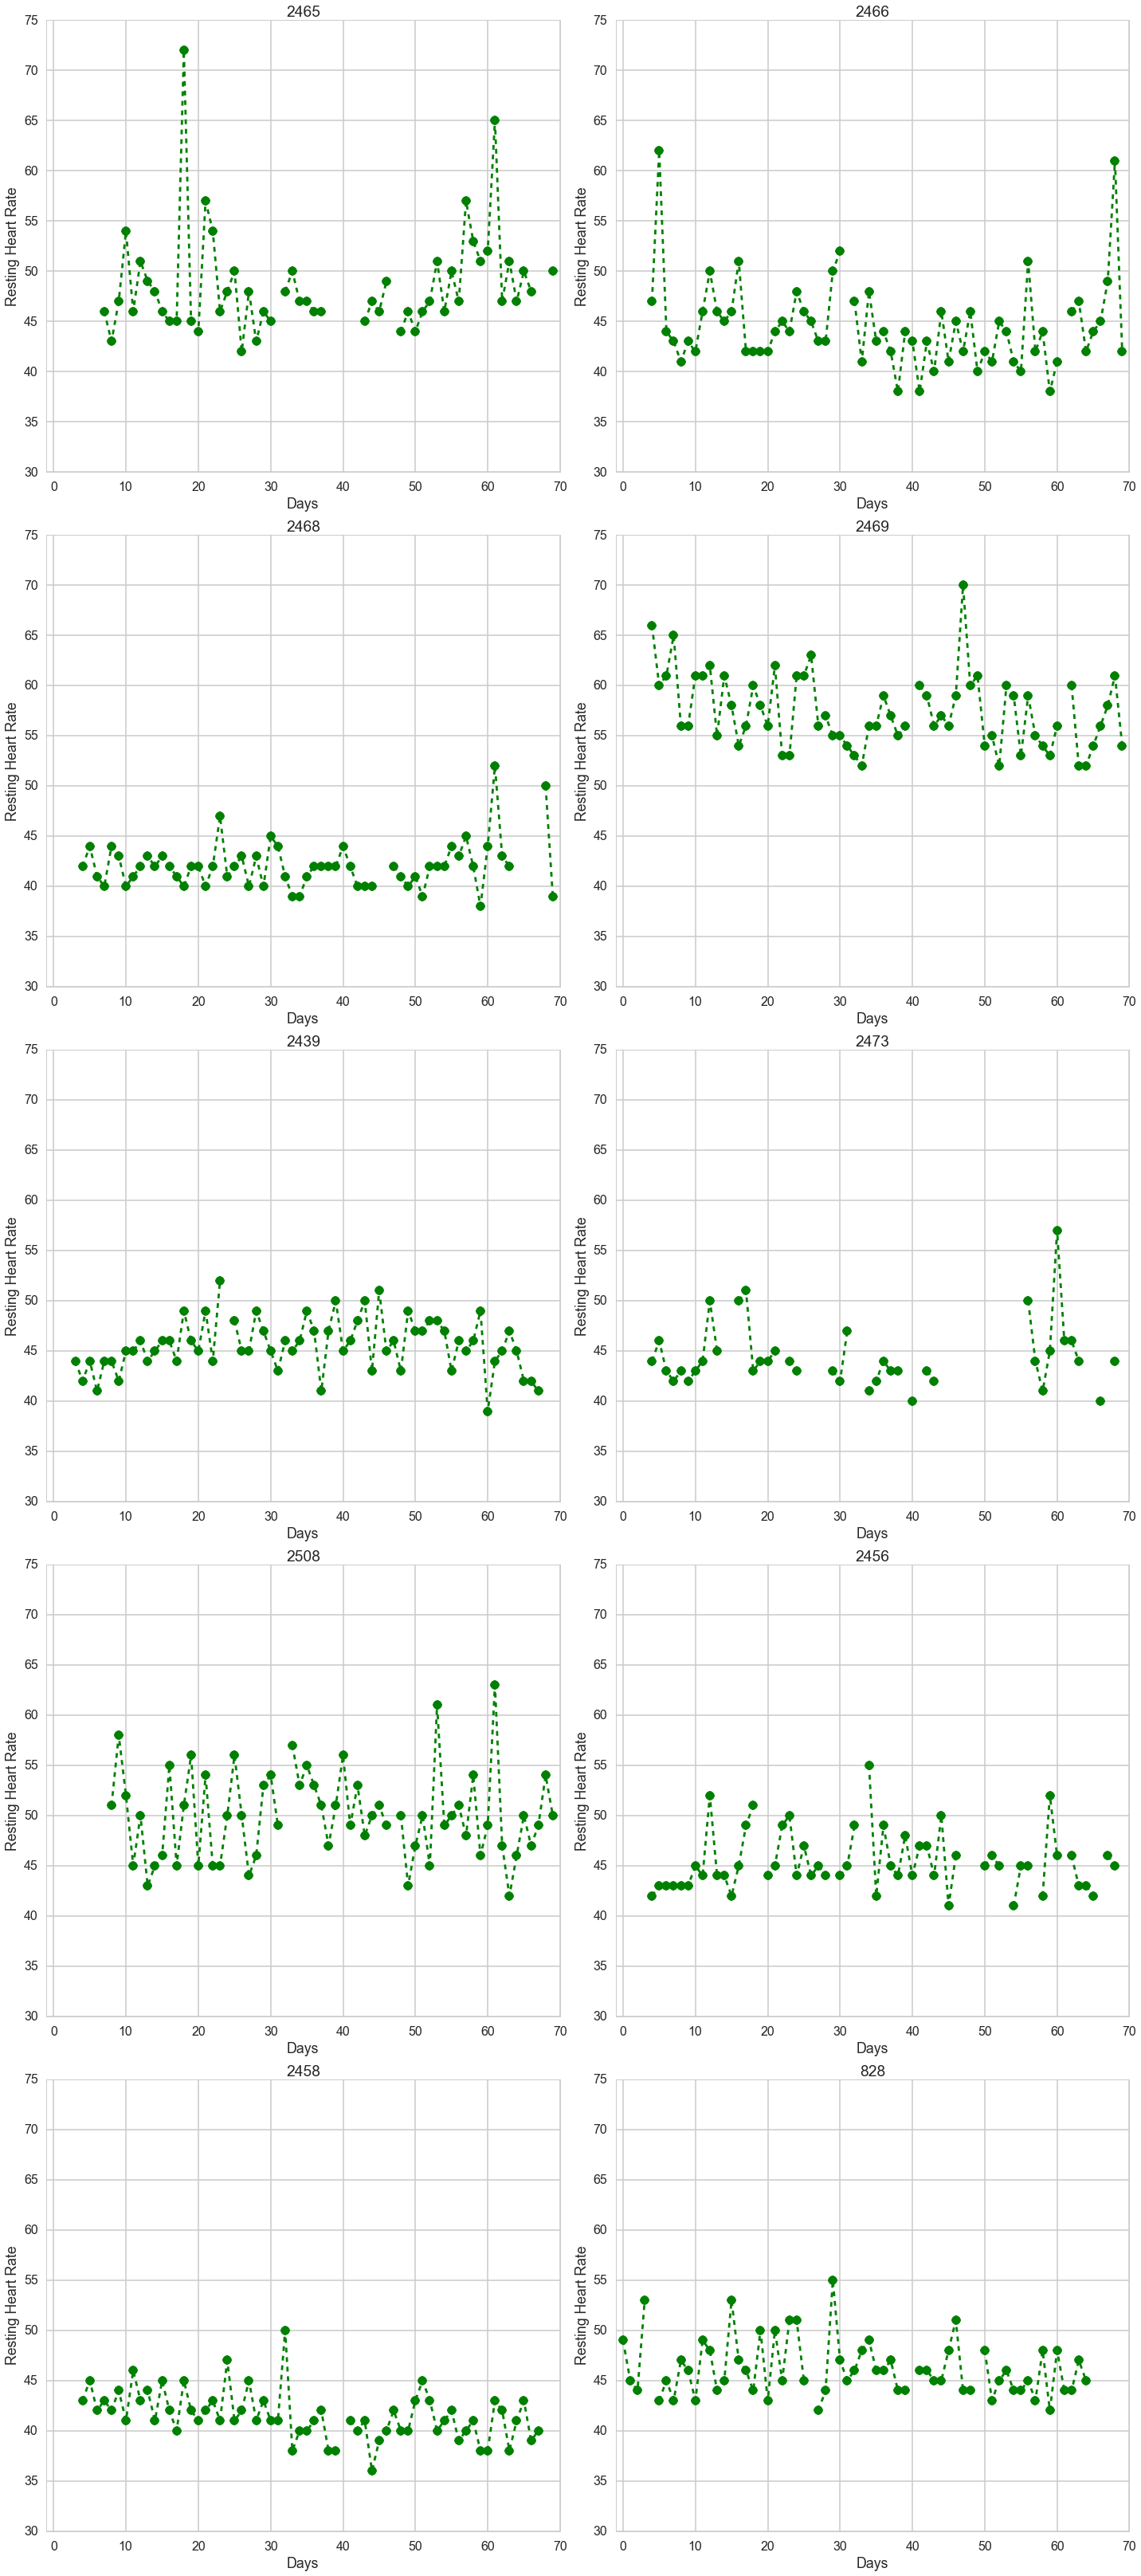

In [127]:
RHR_plots(test)